In [3]:
import torch
import torchvision
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [42]:
directory_path = Path("dataset/plantdisease/PlantVillage/")
df = pd.DataFrame(columns=['label', 'image_path', 'height', 'width'])
for image_path in directory_path.rglob('*.JPG'):
    if image_path.is_file():
        label = str(image_path).split('/')[-2]
        img = Image.open(image_path)
        width, height = img.size
        df.loc[len(df)] = [label, image_path, height, width]

df.to_csv('dataset.csv')
df.head(5)

,label,image_path,height,width
0,Tomato_healthy,dataset/plantdisease/PlantVillage/Tomato_healt...,256,256
1,Tomato_healthy,dataset/plantdisease/PlantVillage/Tomato_healt...,256,256
2,Tomato_healthy,dataset/plantdisease/PlantVillage/Tomato_healt...,256,256
3,Tomato_healthy,dataset/plantdisease/PlantVillage/Tomato_healt...,256,256
4,Tomato_healthy,dataset/plantdisease/PlantVillage/Tomato_healt...,256,256


In [43]:
idx_to_label = {}
label_to_idx = {}
for idx, labels in enumerate(list(df['label'].unique())):
    idx_to_label[idx] = labels
    label_to_idx[labels] = idx
    idx += 1


In [44]:
## Map Labels to Indicies
df['label_idx'] = df['label'].map(label_to_idx)
df['label_idx'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [45]:
## Counts of classes are imbalanced, will require some for of handling. Either handle through oversampling or cross entropy weighted loss.
## Potential for Data Augmentation here as well

In [46]:
counts = df["label_idx"].value_counts().sort_index().values
counts

array([3180, 2000, 6416, 2000, 2808, 2000, 1904, 3352, 3542,  746, 1994,
       4254, 3512, 2952,  304])

In [47]:
## Histogram of widths and heights

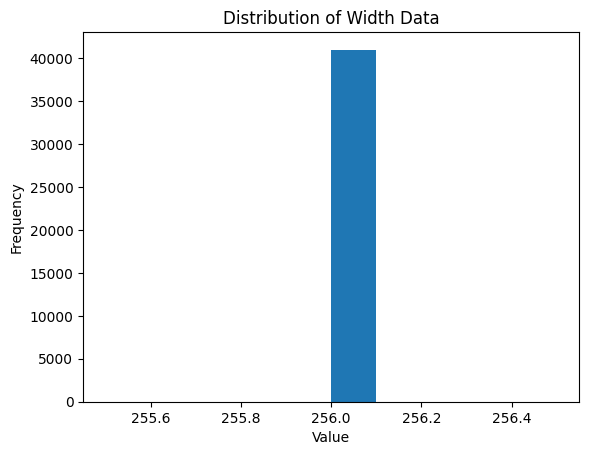

In [49]:
plt.hist(np.array(df['width']))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Width Data")
plt.show()

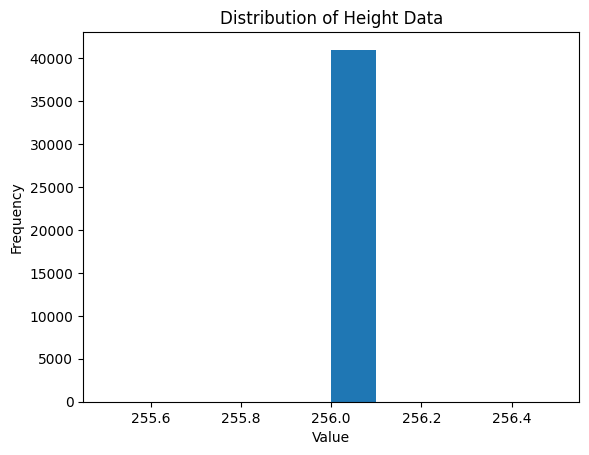

In [50]:
plt.hist(np.array(df['height']))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Height Data")
plt.show()

### Visual Inspection

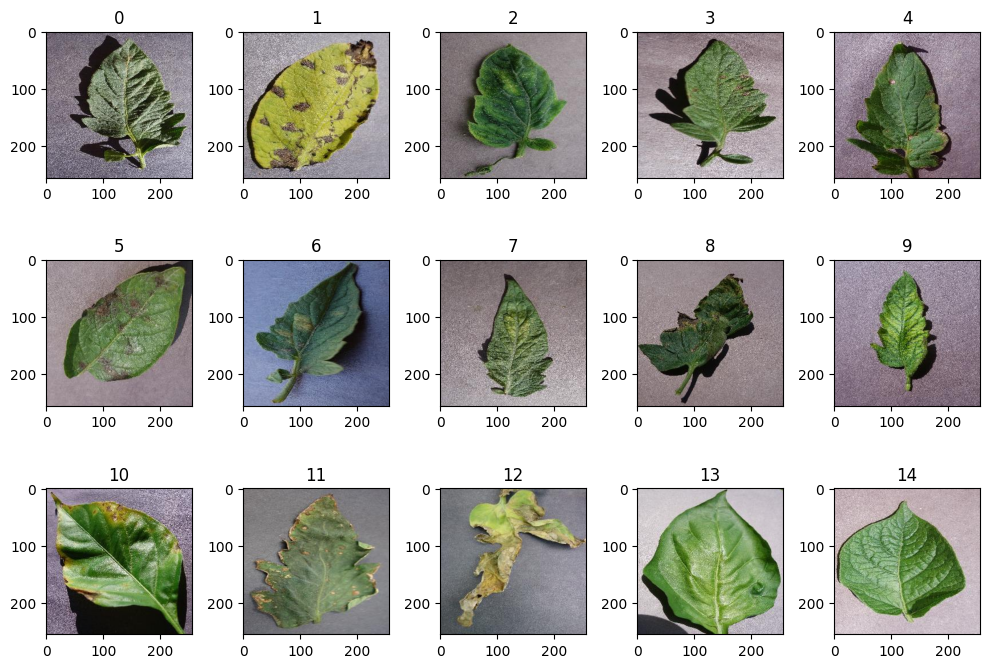

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(10, 7))

for i, ax in enumerate(axes.flat):
    image_path = df[df["label_idx"] == i].iloc[0]["image_path"]
    img = Image.open(image_path)
    ax.set_title(i)

    img_arr = np.array(img)
    ax.imshow(img_arr) # Display the image

plt.tight_layout()


### Pixel Statistics

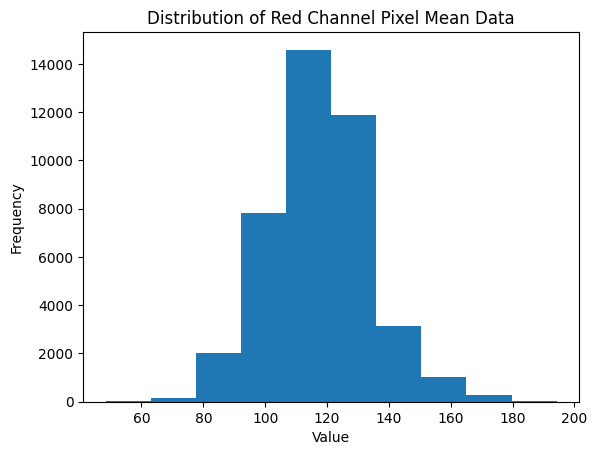

In [79]:
r_channel_mean = []
r_channel_std = []

g_channel_mean = []
g_channel_std = []

b_channel_mean = []
b_channel_std = []

counter = 0
for index, rows in df.iterrows():
    img = Image.open(rows["image_path"])
    r_channel, g_channel, b_channel = img.split()
    r_channel_mean.append(np.mean(np.array(r_channel)))
    g_channel_mean.append(np.mean(np.array(g_channel)))
    b_channel_mean.append(np.mean(np.array(b_channel)))

    r_channel_std.append(np.std(np.array(r_channel)))
    g_channel_std.append(np.std(np.array(g_channel)))
    b_channel_std.append(np.std(np.array(b_channel)))
plt.hist(np.array(r_channel_mean))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Red Channel Pixel Mean Data")
plt.show()

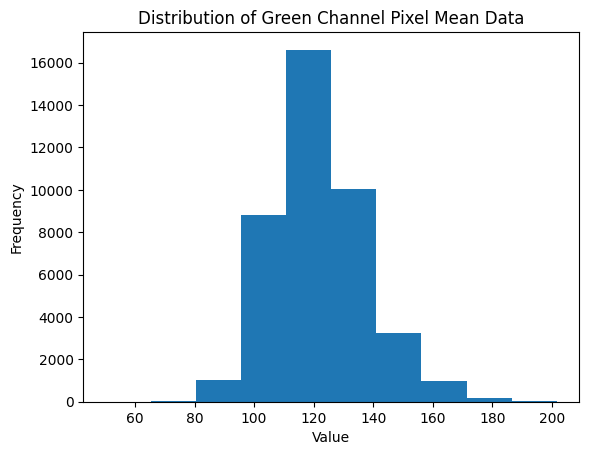

In [76]:
plt.hist(np.array(g_channel_mean))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Green Channel Pixel Mean Data")
plt.show()

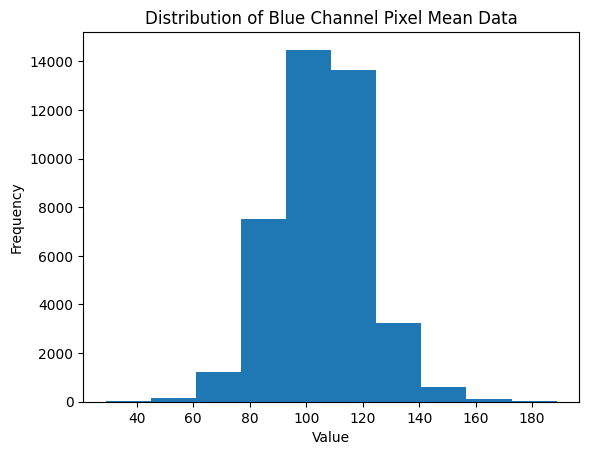

In [80]:
plt.hist(np.array(b_channel_mean))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Blue Channel Pixel Mean Data")
plt.show()

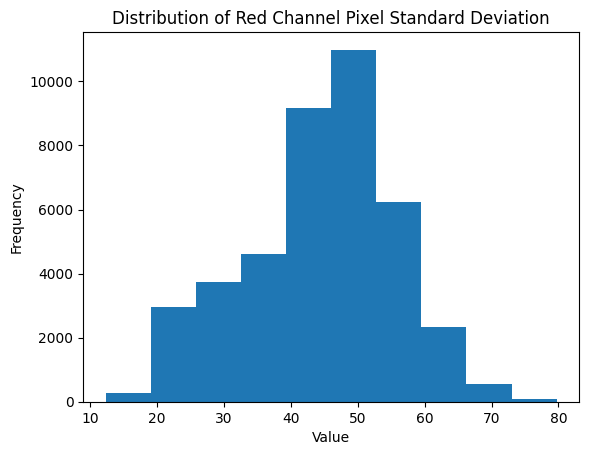

In [81]:
plt.hist(np.array(r_channel_std))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Red Channel Pixel Standard Deviation")
plt.show()

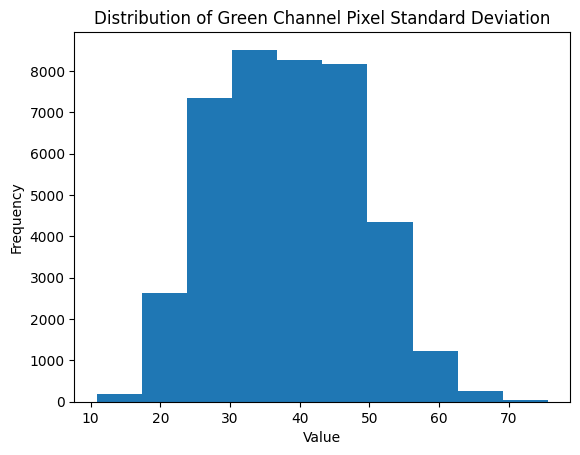

In [82]:
plt.hist(np.array(g_channel_std))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Green Channel Pixel Standard Deviation")
plt.show()

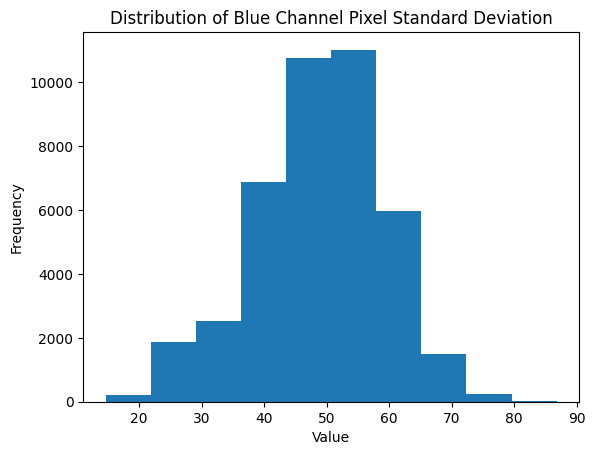

In [83]:
plt.hist(np.array(b_channel_std))
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Blue Channel Pixel Standard Deviation")
plt.show()

In [ ]:
## All three of the channels show a wide variety of pixel standard deviation, suggesting that these images may be feature rich